Initial Data:
    Genre  Duration  Rating
0  Action     120.0     7.5
1   Drama     150.0     8.0
2  Action     110.0     7.0
3    None      95.0     6.5
4  Comedy       NaN     7.2
5   Drama     140.0     8.1

Data After Handling Missing Values:
     Genre  Duration  Rating
0   Action     120.0     7.5
1    Drama     150.0     8.0
2   Action     110.0     7.0
3  Missing      95.0     6.5
4   Comedy     120.0     7.2
5    Drama     140.0     8.1


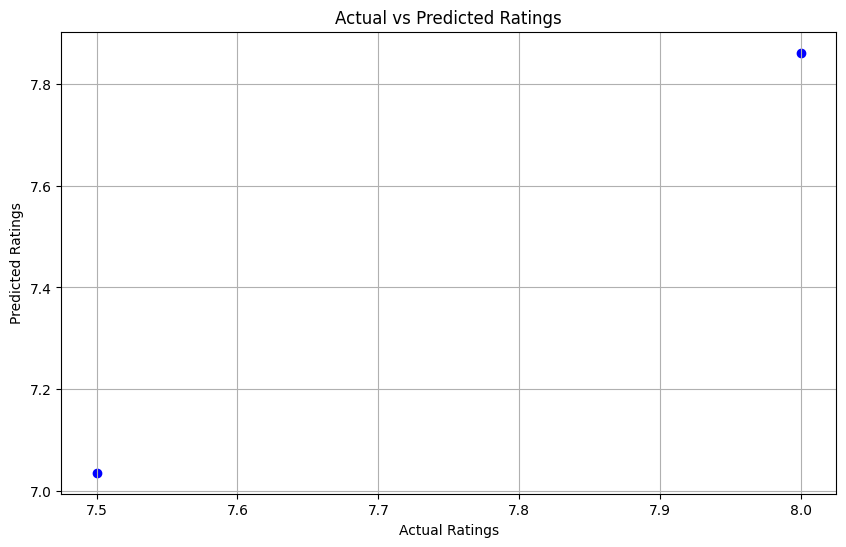


Predictions vs Actual Values:
Actual: 7.50, Predicted: 7.04
Actual: 8.00, Predicted: 7.86


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Sample DataFrame creation (Replace this with loading your dataset)
data = {
    'Genre': ['Action', 'Drama', 'Action', None, 'Comedy', 'Drama'],
    'Duration': [120, 150, 110, 95, None, 140],
    'Rating': [7.5, 8.0, 7.0, 6.5, 7.2, 8.1]
}
movies_df = pd.DataFrame(data)

# Display the initial data
print("Initial Data:")
print(movies_df)

# Handling Missing Values in 'Genre'
# Replace missing values with 'Missing' directly
movies_df['Genre'] = movies_df['Genre'].fillna('Missing')

# Handling Missing Values in 'Duration'
movies_df['Duration'] = movies_df['Duration'].fillna(movies_df['Duration'].median())

# Display the data after handling missing values
print("\nData After Handling Missing Values:")
print(movies_df)

# Features and target variable
X = movies_df[['Genre', 'Duration']]
y = movies_df['Rating']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('genre', OneHotEncoder(handle_unknown='ignore'), ['Genre']),
        ('duration', StandardScaler(), ['Duration'])
    ])

# Full pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

# Print out the predictions and actual values for comparison
print("\nPredictions vs Actual Values:")
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual:.2f}, Predicted: {predicted:.2f}')
